### Comparing mass balance in four column runs
### 1. 3D column run
### 2. no-subgrid (intermediate-model) column run
### 2. subgrid (intermediate-model) column run with del_max = del_ex = depr_depth = 0 (trial parameters)
### 2. subgrid (intermediate-model) column run with del_max = 0.4, del_ex = 0.2 , depr_depth = 0.15 (typical LCP)

In [1]:
import sys, os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.signal
import importlib
import h5py
sys.path.append('/Users/ajc/Core/PreProcessing/PyScript')
import readdata

In [2]:
path ='/Users/ajc/FUSE/simulations/tests/ats-intermediate-ngee-up/single_column/'
path = "/Users/ajc/Core/simulations/tests/ats-intermediate-ngee-up/single_column/"
Simulations = [['CESM_5050_R10_3D'], ['CESM_5050_R10_B'],['CESM_5050_R30_B'],['CESM_5050_R30_BX']]
Sim_name = ['S1','S2','S3','S3X']
f_name = ['ats_vis_surface_data.h5','ats_vis_surface_column_0_data.h5', 'ats_vis_surface_column_0_data.h5','ats_vis_surface_column_0_data.h5']
snow_f_name = ['ats_vis_snow_data.h5','ats_vis_snow_column_0_data.h5', 'ats_vis_snow_column_0_data.h5','ats_vis_snow_column_0_data.h5']
ss_f_name = ['ats_vis_data.h5','ats_vis_column_0_data.h5', 'ats_vis_column_0_data.h5','ats_vis_column_0_data.h5']

var_name = ['surface', 'surface_column_0','surface_column_0','surface_column_0']
snow_var_name = ['snow', 'snow_column_0','snow_column_0','snow_column_0']
ss_var_name = ['domain', 'column_0','column_0','column_0']


In [27]:
to_day_mm = 86400 * 1000
to_day_year_mm = 86400 * 365 * 1000
to_day_year = 86400 * 365 
to_mm = 1000.
surface_area = 1#61.92
molar_den = 1000./0.018


In [4]:
def getSurfaceData(i,var,hdf_file='ats_vis_surface_data.h5',yr_len=365, average=True):
    Data = []
    for s in Simulations[i]:
        infile = os.path.join(path,s,hdf_file)
        dx=h5py.File(infile,'r')
        d = np.array(readdata.GetSurfVarFromVis_All(infile,var)[var])
        if (average):
            d = d.mean(axis=1)
        else:
            d = d.sum(axis=1)
        L = len(d)%yr_len
        if L >0:
            d = d[:-L]
        Data.append(d)
    d = dict()
    d[var] = np.concatenate(Data)
    
    return d

In [43]:
def Evaporation(yr_len):
    #time = 2006 + np.linspace(0,94,94,dtype='int')
    d3_sf = []
    sf_change = 0
    Evap = dict()
    for i,sim in enumerate(Simulations):
        var = var_name[i] + '-evaporative_flux'
        d1 = getSurfaceData(i, var, hdf_file=f_name[i],yr_len=yr_len)[var]
        d2 = [x*molar_den*surface_area for x in d1] # m/s --> m/s * moles/m^3 * m^2 = moles/sec
        
        Evap[Sim_name[i]] = np.reshape(d2,(-1,yr_len)).mean(axis=1)*to_day_year
        print (Evap[Sim_name[i]])
        print (Evap[Sim_name[i]]/molar_den*1000)
        print ('---------_')
    return Evap

In [44]:
E_annual = Evaporation(yr_len=365)
#print (E_annual['S1'], E_annual['S2'], E_annual['S3'], E_annual['S3X'])
#print (E_annual['S1']/molar_den*1000,E_annual['S2']/molar_den*1000)

[ 7114.81541228 10100.58406522 11297.15128447 14780.32335743
 19743.34427655]
[128.06667742 181.81051317 203.34872312 266.04582043 355.38019698]
---------_
[ 7217.05160014  9888.61181081 12073.4880804  15144.9559885
 20063.75698119]
[129.9069288  177.99501259 217.32278545 272.60920779 361.14762566]
---------_
[ 7121.10543664 10001.86705773 11870.60589861 15019.01964501
 20434.42630918]
[128.17989786 180.03360704 213.67090617 270.34235361 367.81967357]
---------_
[ 6811.22158774 10375.41283487 11936.58088505 14948.63547495
 19837.25433158]
[122.60198858 186.75743103 214.85845593 269.07543855 357.07057797]
---------_


In [53]:
def SF_WaterContent(yr_len=365):
    SF_WC = dict()
    for i,sim in enumerate(Simulations):
        var = var_name[i] + '-water_content'
        d1_sf = getSurfaceData(i, var, hdf_file=f_name[i],yr_len=yr_len)[var]

        d3_sf = np.reshape(d1_sf,(-1,yr_len))
        d_c = []
        for d in d3_sf:
            c1 = (d[-1] - d[0])#/365. # dt = 365 - 0
            d_c.append(c1)
        SF_WC[Sim_name[i]] = np.array(d_c)
        print (SF_WC[Sim_name[i]])
        print (SF_WC[Sim_name[i]]/molar_den*1000)
    return SF_WC

In [54]:
SF_WC = SF_WaterContent(yr_len=365)

[   0.            0.          386.41336261 -386.41336261    0.        ]
[ 0.          0.          6.95544053 -6.95544053  0.        ]
[   0.            0.          401.21617239 -401.21617239    0.        ]
[ 0.         0.         7.2218911 -7.2218911  0.       ]
[   0.            0.          485.30453092 -485.30453092    0.        ]
[ 0.          0.          8.73548156 -8.73548156  0.        ]
[   0.            0.          317.22064048 -317.22064047    0.        ]
[ 0.          0.          5.70997153 -5.70997153  0.        ]


In [9]:
def getSubSurfaceData(i,hdf_file='visdump_data.h5',yr_len=365,average=False):
    Data = []
    if 'column' in ss_var_name[i]:
        var = ss_var_name[i] + '-water_content'
    else:
        var = 'water_content'
    hdf_file = ss_f_name[i]
    #print ('getSubSurfaceData: ',i, var,hdf_file)
    for s in Simulations[i]:
        infile=os.path.join(path,s,hdf_file)
        #print (infile)
        d1_ss = readdata.GetSumSurfVarFromVis(file=infile, var=var)[var]
        L = len(d1_ss)%yr_len
        if L >0:
            d1_ss = d1_ss[:-L]
            
        Data.append(d1_ss)
    d = np.concatenate(Data)
    
    return d

In [55]:
from multiprocessing import Pool
from functools import partial
num_processors = 4

pool=Pool(processes = num_processors)

def SS_WaterContent(yr_len=365):
    SS_WC = dict()

    prod_x=partial(getSubSurfaceData,hdf_file=f_name[0],yr_len=yr_len)
    global DataS1, DataS2, DataS3
    DataS1, DataS2, DataS3, DataS4 = pool.map(prod_x,[i for i in range(len(Simulations))])
    d1 = [DataS1, DataS2,DataS3, DataS4]
    for i in range(4):
        d1_ss = d1[i]
        d3_ss = np.reshape(d1_ss,(-1,yr_len))
        d_c = []
        for d in d3_ss:
            c1 = (d[-1] - d[0])#/365. # dt = 365 -0 
            d_c.append(c1)
        SS_WC[Sim_name[i]] = np.array(d_c)
        print (SS_WC[Sim_name[i]])
        print (SS_WC[Sim_name[i]]/molar_den*1000)
    return SS_WC

In [56]:
SS_WC = SS_WaterContent(yr_len=365)

[3856.75816919 4975.39468364  339.21726483 -332.11682592 -487.32803601]
[69.42164705 89.55710431  6.10591077 -5.97810287 -8.77190465]
[3707.93287026 5127.15450579  332.36390089 -290.8161051  -460.04540218]
[66.74279166 92.2887811   5.98255022 -5.23468989 -8.28081724]
[3761.73440543 5104.4252982   302.95376274  -70.05371744 -684.58068624]
[ 67.7112193   91.87965537   5.45316773  -1.26096691 -12.32245235]
[3817.31842683 4382.60426795  974.123814   -843.05181129   46.08736076]
[ 68.71173168  78.88687682  17.53422865 -15.1749326    0.82957249]


In [59]:
def Snow_WaterContent(yr_len=365):
    SF_SC = dict()
    for i,sim in enumerate(Simulations):
        if 'column' in snow_var_name[i]: 
            var = snow_var_name[i] + '-snow_water_equivalent'
        else:
            var = 'snow-water_equivalent'

        d1_sf = getSurfaceData(i, var, hdf_file=snow_f_name[i],yr_len=yr_len)[var]

        d3_sf = np.reshape(d1_sf,(-1,yr_len))
        d_c = []
        for d in d3_sf:
            c1 = (d[-1] - d[0]) * molar_den
            d_c.append(c1)
        SF_SC[Sim_name[i]] = np.array(d_c)
        print (SF_SC[Sim_name[i]])
        print (SF_SC[Sim_name[i]]/molar_den*1000)
    return SF_SC

In [60]:
SNOW_WC = Snow_WaterContent(yr_len=365)

[ 4082.86282251 -1688.50870737  2847.09536328 -3152.5482541
 -1512.61344421]
[ 73.49153081 -30.39315673  51.24771654 -56.74586857 -27.227042  ]
[ 4051.67207007 -1663.30621872  2996.45859124 -3255.36040454
 -1553.28900703]
[ 72.93009726 -29.93951194  53.93625464 -58.59648728 -27.95920213]
[ 4149.17908742 -1737.38834568  3092.72910784 -3366.65744138
 -1560.52114374]
[ 74.68522357 -31.27299022  55.66912394 -60.59983394 -28.08938059]
[ 4392.09395339 -1366.89501373  2493.77725771 -2691.67715767
 -1619.14451266]
[ 79.05769116 -24.60411025  44.88799064 -48.45018884 -29.14460123]


In [14]:
print (len(E_annual['S1']), len(SS_WC['S1']), len(SF_WC['S1']), len(SNOW_WC['S1']))
Total_S1 = E_annual['S1'] + SS_WC['S1'] + SF_WC['S1'] + SNOW_WC['S1'] 
Total_S2 = E_annual['S2'] + SS_WC['S2'] + SF_WC['S2'] + SNOW_WC['S2'] 
Total_S3 = E_annual['S3'] + SS_WC['S3'] + SF_WC['S3'] + SNOW_WC['S3'] 
Total_S3X = E_annual['S3X'] + SS_WC['S3X'] + SF_WC['S3X'] + SNOW_WC['S3X'] 

5 5 5 5


In [61]:
#in mm
#print (len(E_annual['S1']), len(SS_WC['S1']), len(SF_WC['S1']), len(SNOW_WC['S1']))
Total_S1mm = (E_annual['S1'] + SS_WC['S1'] + SF_WC['S1'] + SNOW_WC['S1'])/molar_den*1000
Total_S2mm = (E_annual['S2'] + SS_WC['S2'] + SF_WC['S2'] + SNOW_WC['S2'] )/molar_den*1000
Total_S3mm = (E_annual['S3'] + SS_WC['S3'] + SF_WC['S3'] + SNOW_WC['S3'] )/molar_den*1000
Total_S3Xmm = (E_annual['S3X'] + SS_WC['S3X'] + SF_WC['S3X'] + SNOW_WC['S3X'] )/molar_den*1000
print (Total_S1mm,Total_S2mm,Total_S3mm,Total_S3Xmm)

[270.97985527 240.97446075 267.65779095 196.36640847 319.38125033] [269.57981773 240.34428176 284.46348141 201.55613952 324.9076063 ] [270.57634073 240.64027218 283.5286794  199.74607119 327.40784063] [270.37141142 241.0401976  282.99064675 199.74034558 328.75554923]


In [16]:
forcing_watershed_FM = h5py.File("/Users/ajc/Core/PreProcessing/ats-intermediate-ngee/data/SNAP/CESM-RCP8.5-2006-2100_dm1985-2015-FM_2006.h5",'r')

In [17]:
d1 = forcing_watershed_FM['precipitation rain [m s^-1]']
d2 = forcing_watershed_FM['precipitation snow [m SWE s^-1]']

d3 = [x +y for x,y in zip(d1,d2)]
precip_annual = np.reshape(d3, (-1,365)).mean(axis=1)*molar_den*surface_area*to_day_year


In [64]:
print (precip_annual[0]/molar_den*1000) 
print ((precip_annual[0] - Total_S1)/molar_den*1000,(precip_annual[0] - Total_S2)/molar_den*1000)

259.0004231955746
[-11.97943208  18.02596245  -8.65736776  62.63401473 -60.38082714] [-10.57939453  18.65614143 -25.46305821  57.44428368 -65.9071831 ]


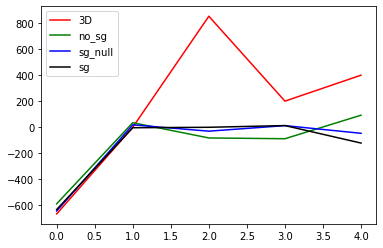

10.799999999999999


In [66]:
S1 = [(p - s) for p,s in zip(precip_annual,Total_S1)]
S2 = [(p - s) for p,s in zip(precip_annual,Total_S2)]
S3 = [(p - s) for p,s in zip(precip_annual,Total_S3)]
S3X = [(p - s) for p,s in zip(precip_annual,Total_S3X)]

plt.plot(S1, 'r-',label='3D')
plt.plot(S2, 'g-',label='no_sg')
plt.plot(S3, 'b-',label='sg_null')
plt.plot(S3X,'k-',label='sg')
plt.legend()
plt.show()
print (600/molar_den*1000)

In [ ]:
print (E_annual['S1'], E_annual['S2'], E_annual['S3'], E_annual['S3X'])
print (SS_WC['S1'], SS_WC['S2'], SS_WC['S3'], SS_WC['S3X'])
print (SF_WC['S1'], SF_WC['S2'], SF_WC['S3'], SF_WC['S3X'])
print (SNOW_WC['S1'], SNOW_WC['S2'], SNOW_WC['S3'], SNOW_WC['S3X'])

In [ ]:
128+ 69 + 73